# Statistical Mechanics Model of Promoter Binding
In this notebook, we will calculate the probability that a gene's promoter is bound by RNA polymerase.

In [1]:
import math
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

Now that we have the imports done, let's define a few functions. Recall that there are a number of different scenarios that can be explored:
* No activation or repression
* Only repression
* Only activation
* Interplay of both repression and activation

## Model Parameters
Each scenario relies on a number of parameters:
* Number of molecules in the cell:
  * $N$, the number of non-specific binding sites in the genome
  * $P$, the number of RNA polymerases
  * $R$, the number of repressors
  * $A$, the number of activators


* Binding energies, all in terms of $k_BT$:
  * $E_{bound}$, the energy of non-specific binding
  * $E_{promoter}$, the energy of the polymerase binding to the promoter
  * $E_{operator}$, the energy of the repressor binding to the operator
  * $E_{activator}$, the energy of the activator binding to the activating site
  * $E_{int}$, the energy of the interaction between the activator and the polymerase

In [17]:
# Set the number of non-specific binding sites in the genome
N = 5e6 # Note that python can easily handle scientific notation!

# Next, set the number of RNA polymerases.
# We're going to look at a range of possible values
# from 1000 to 10000, incrementing by 100.
# 10001 is used since the `range` function uses an
# exclusive upper bound.
P = np.arange(1000, 10001, 100)

# Similarly, let's set the number of repressors
R = np.arange(0, 101)

# And the number of activators
A = np.arange(0, 1001, 10)

# Now, we need to set the binding energies
eBound = 0 # Energy of non-specific binding, in terms of kBT
ePromoter = -8 # Energy of polymerase binding promoter, also in kBT
eOperator = -17 # Energy of repressor binding to operator, in kBT
eActivator = -13 # Energy of activator binding to activating site, in kBT
eInt = -5.51 # Energy of interaction between activator and polymerase, in kBT

Now that we have the basic parameters for the model set up, we can start examining different scenarios. 
______

## **No Repression and No Activation**

First, let's consider the case where there is no regulation. The system contains no activators or repressors. The main actor here is the polymerase. The probability of the promoter being bound can be found using the following equation:$$p_P = \frac{1}{1+\frac{N}{P}e^{(E_{promoter}-E_{bound})}}$$

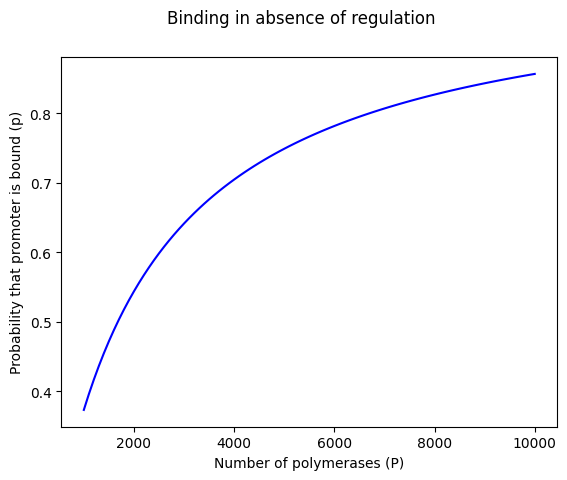

In [18]:
# No regulation: R = 0 and A = 0
probabilities = []

# Let's iterate over all possible numbers of polymerase
for i in P:
  # Use equation 6.23; to use the exponential function, just call math.exp
  prob = 1/(1+(N/i)*math.exp(ePromoter-eBound))
  probabilities.append(prob)

# BUT, since we've set up Numpy arrays, we can actually do math on the entire array!
prob_P = 1/(1+(N/P)*np.exp(ePromoter-eBound))

# Now that we have the probabilities for each polymerase, let's make a plot
plt.plot(P, prob_P, "b-")
plt.xlabel("Number of polymerases (P)")
plt.ylabel("Probability that promoter is bound (p)")
plt.suptitle("Binding in absence of regulation")
plt.show()

Notice what type of graph this is...

Now, you might want to play with some of these parameters... but it's a bit difficult without going back up and changing our initial code. So, instead, let's wrap this in a **function**.

In [19]:
def no_regulation(N=5e6, minP=1000, maxP=10001, stepP=100, ePromoter=ePromoter, eBound=eBound):
  """
  Plot the graph for the stat mech model of gene expression 
  in a context of no regulation.

  - Parameters:
    - N: number of non-specific binding sites
    - minP: minimum number of polymerases
    - maxP: maximum number of polymerases
    - stepP: increments to use in the domain
    - ePromoter: energy of polymerase binding to the promoter (kBT)
    - eBound: energy of the non-specific binding (kBT)
  """
  P = np.arange(minP, maxP, stepP)

  prob_P = 1/(1+(N/P)*math.exp(ePromoter-eBound))
  plt.plot(P, prob_P, "b-")
  plt.xlabel("Number of polymerases (P)")
  plt.ylabel("Probability that promoter is bound (p)")
  plt.suptitle("Binding in absence of regulation")
  plt.show()

Now that we have defined a function, we can run it.

**NOTE:** make a new `code` cell for each set of parameters, since the jupyter notebook only shows the last result from each cell.

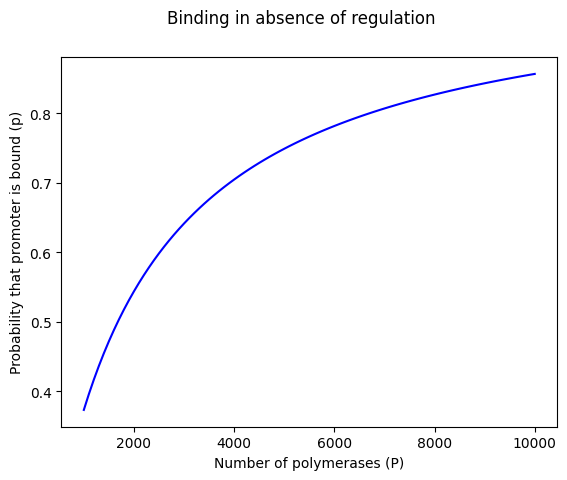

In [20]:
no_regulation()

Note: calling it without any arguments just uses the defaults.

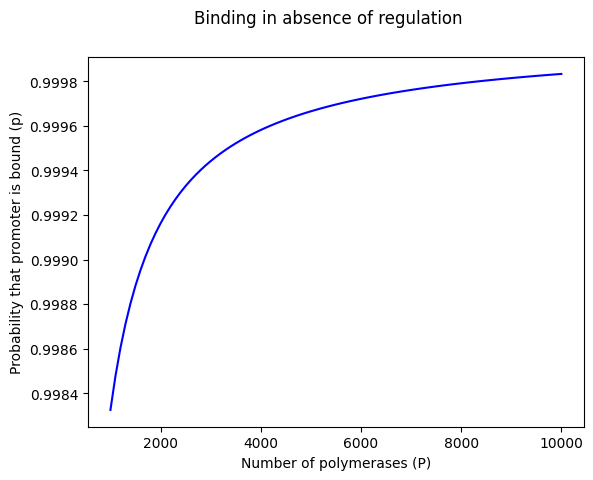

In [21]:
no_regulation(N=5000) #To change any parameter, just add `parameterName=____new value____`

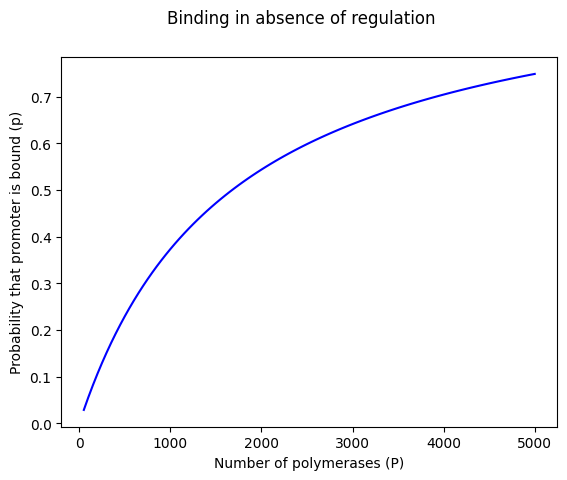

In [22]:
no_regulation(minP=50, maxP=5001, stepP=50)

Feel free to add more cells and play around with the parameters.

To change all of them, simply type in:
```
no_regulation(N=__, minP=__, maxP=__, stepP=__, ePromoter=__, eBound=__)
```
Just replace the underscores with the desired values. Only use **integers**.

## **Simple Regulation**
Now, let's move on to a slightly more complicated scenario. Instead of the number of polymerases determining the probability of binding, **activators** and **repressors** will affect the binding.

To simplify the process, we will fix the number of polymerases. $$P=1000$$

In [121]:
P = 1000

### **Repression**

First, simple repression will be analysed. In order to determine the probabilities, the following formulas will be used:

Regulation factor:
$$ Freg_R = \frac{1}{1 + \frac{R}{N}e^{-(E_{operator}-E_{bound})}} $$

Probability of promoter being bound:
$$ p_R = \frac{1}{1 + \frac{N}{P \cdot Freg_R}e^{(E_{promoter}-E_{bound})}} $$
This is used to find the probability that the promoter is bound for a given _R_.

This time, we'll start right away by wrapping it in a function.

In [23]:
def simple_repression(N=5e6, minR=0, maxR=101, stepR=1, ePromoter=ePromoter, eOperator=eOperator, eBound=eBound, P=1000):
  R = np.arange(minR, maxR, stepR)
  Freg_r = 1/(1+(R/N)*math.exp(-(eOperator - eBound)))
  prob_R = 1/(1+(N/(P*Freg_r))*math.exp(ePromoter-eBound))

  # And now for another plot!
  plt.plot(R, prob_R, "r-")
  plt.xlabel("Number of repressors (R)")
  plt.ylabel("Probability that promoter is bound (p_R)")
  plt.suptitle("Binding with simple repression")

Now that we have this function defined, let's run it with the default arguments.

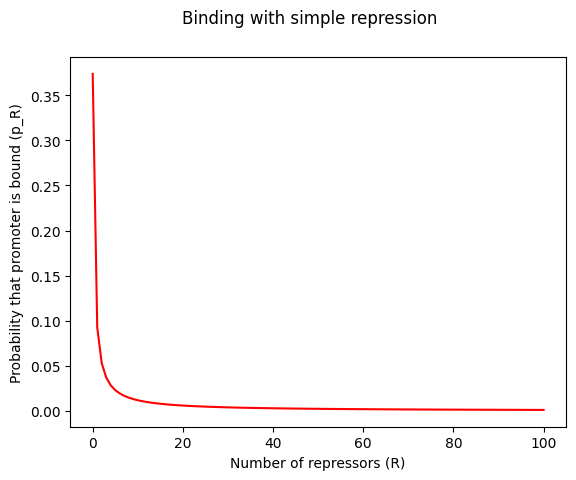

In [24]:
simple_repression()

Like with `no_regulation`, we can play around with the parameters to get different graphs.

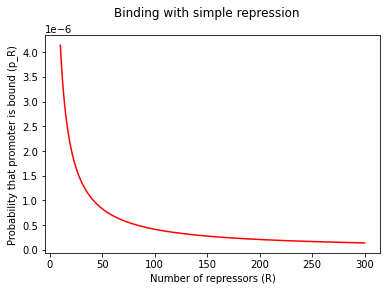

In [124]:
simple_repression(N=30000, minR=10, maxR=301, eOperator=-20)

This plot is quite different from the last one. Why do you think that is? Does this make sense?

### Simple Activation

Now, we will look at an example with simple activation and no repression. The equations used here are a bit more complicated.

$$ Freg_A = \frac{1+ \frac{A}{N} e^{-(E_{activator}-E_{bound})} e^{-E_{int} }}{1 + \frac{A}{N} e^{-(E_{activator}-E_{bound})}}$$

And for the probability for a given _A_:

$$ p_A = \frac{1}{1+\frac{N}{P\cdot Freg_A}e^{(E_{promoter}-E_{bound})}}$$

In [7]:
def simple_activation(N=5e6, minA=0, maxA=1001, stepA=10, ePromoter=ePromoter, eActivator=eActivator, eBound=eBound, P=1000):
  freg_A = (1+(A/N)*math.exp(-(eActivator-eBound)) \
          * math.exp(-eInt))/(1+(A/N)*math.exp(-(eActivator-eBound)))
  prob_A = 1/(1+(N/(P*freg_A))*math.exp(ePromoter-eBound))

  # And once again to plot
  plt.plot(A, prob_A, "g-")
  plt.xlabel("Number of activators (A)")
  plt.ylabel("Probability that promoter is bound (p_A)")
  plt.suptitle("Binding with simple activation")
  plt.show()

And, as usual, let's first run it with the default arguments.

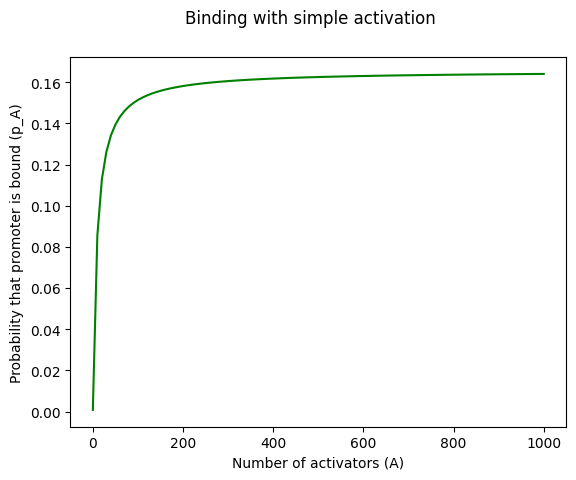

In [11]:
simple_activation(ePromoter=-1.39,eActivator=-13, eBound=0)

And, you can modify the arguments for each parameter like with the other functions.

Again, look at this curve. Why does it look this way? Does it make sense? Think about what it means for the cell in terms of gene expression.

____

## **Activation and Repression**

Now, for a more complicated and realistic example... Let's try including both activation and repression! The math here gets even more complicated. This is because of the interaction and interplay between all the components involved.

$$Freg_{AR} = \frac{1 + \frac{A}{N}e^{-(E_{activator}-E_{bound})-E_{int}}}{1+\frac{A}{N}e^{-(E_{activator}-E_{bound})}+\frac{R}{N}e^{-(E_{operator}-E_{bound})}+\frac{A}{N}\cdot\frac{R}{N}e^{-(E_{activator}-E_{bound}+E_{promoter}-E_{bound})}}$$

And now for the probability:
$$p_{AR}=\frac{1}{1+\frac{N}{P\cdot Freg}e^{(E_{promoter}-E_{bound}})}$$

Notice that here, we're looking at a function with **TWO** variables. So instead of plotting the probabilities against either the number of activators $A$ or the number of repressors $R$, we can plot a **surface** against both variables at the same time.

In [129]:
def activation_repression_3dplots(N=5e6, P=1000, minA=0, maxA=1001, stepA=100, minR=0, maxR=101, stepR=10, eActivator=eActivator, eInt=eInt, eOperator=eOperator, eBound=eBound, ePromoter=ePromoter):
  A = np.arange(minA, maxA, stepA)
  R = np.arange(minR, maxR, stepR)

  A, R = np.meshgrid(A, R)

  freg_AR = (1+(A/N)*np.exp(-(eActivator-eBound)-eInt))/(1+(A/N)*np.exp(-(eActivator-eBound))+(R/N)*np.exp(-(eOperator-eBound))+(A/N)*(R/N)*np.exp(-(eActivator-eBound+ePromoter-eBound)))
  prob_AR = 1/(1+N/(P*freg_AR)*math.exp(ePromoter-eBound))

  figure = plt.figure(figsize=[10, 10])
  axes = figure.gca(projection='3d')
  surface = axes.plot_surface(R, A, prob_AR, cmap=cm.RdYlGn)
  axes.set_xlabel("Number of repressors (R)")
  axes.set_ylabel("Number of activators (A)")
  axes.set_zlabel("Probability that promoter is bound (p_A,R)")
  figure.suptitle("Gene expression with activation and repression")
  plt.show()

Now, let's plot with the defaults (notice, the "step size" for each variable is different).

/var/folders/xk/tcs4mp6s0259tt45hnqsmv440000gn/T/ipykernel_71360/3935292598.py:11: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  axes = figure.gca(projection='3d')


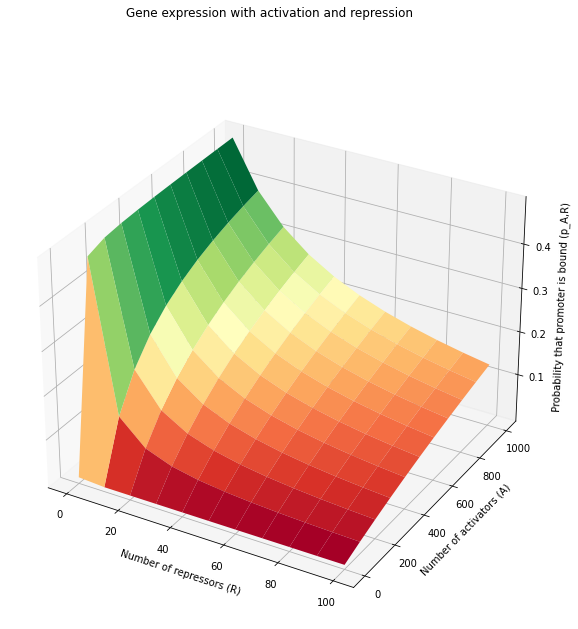

In [132]:
activation_repression_3dplots()

And once again, you can play around with the parameters in the function calls. 

For each parameter set, examine the resulting plots. Does the shape of the surface behave as you expect? How do the number of activators and repressors affect gene expression? Why does a cell typically have more activators then repressors?? Does this mean that genes are always **ON**?